In [1]:
from pyhive import hive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
#!pip install descartes

In [3]:
#!pip install geopandas

In [4]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [6]:
#getting the data of all the states included in the dataset
conn = hive.Connection(host = 'hadoop.rcc.uchicago.edu', 
                       port = 10000, 
                       username = 'norahzx', 
                       database = 'dmp_yelp_rs')
cursor = conn.cursor()
query = 'select distinct state from business_basicdata'
cursor.execute(query)
res1 = cursor.fetchall()

In [7]:
df = pd.DataFrame(res1, columns = [cursor.description[0][0]])

In [8]:
df.drop(index = 0, inplace = True)

In [9]:
df.state.unique()

array(['ABE', 'BC', 'CO', 'DE', 'FL', 'GA', 'KS', 'KY', 'MA', 'MN', 'NH',
       'OH', 'OR', 'TX', 'VA', 'WA', 'WY'], dtype=object)

In [10]:
#getting all the data from business_basicdata table
conn = hive.Connection(host = 'hadoop.rcc.uchicago.edu', 
                       port = 10000, 
                       username = 'norahzx', 
                       database = 'dmp_yelp_rs')
cursor = conn.cursor()
query = 'select * from business_basicdata'
cursor.execute(query)
res = cursor.fetchall()

In [11]:
df_states = pd.DataFrame(res, columns = [i[0].split('.')[1] for i in cursor.description])

In [12]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63898 entries, 0 to 63897
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   business_id          63898 non-null  object
 1   name                 63898 non-null  object
 2   address              63898 non-null  object
 3   city                 63898 non-null  object
 4   state                63898 non-null  object
 5   postal_code          63897 non-null  object
 6   latitude             63897 non-null  object
 7   longitude            63897 non-null  object
 8   stars                63897 non-null  object
 9   review_count         63897 non-null  object
 10  is_open              63897 non-null  object
 11  categories           63897 non-null  object
 12  simplified_category  63897 non-null  object
dtypes: object(13)
memory usage: 6.3+ MB


In [13]:
df_states = df_states.dropna()

In [14]:
#df_states[(df_states['state'] =='WY')]

business_id                                 name  \
36827  kCuT3xDEMWjzfpN70kIRyg  Good Times Burgers & Frozen Custard   

                 address      city state postal_code   latitude    longitude  \
36827  2175 Sugarland Dr  Sheridan    WY       82801  40.022457  -105.260884   

      stars review_count is_open  \
36827   1.5            9       1   

                                              categories simplified_category  
36827  Burgers, Fast Food, Diners, Ice Cream & Frozen...           Fast Food

In [15]:
#correcting certain data types
df_states['longitude'] = df_states['longitude'].apply(lambda x: float(x))
df_states['latitude'] = df_states['latitude'].apply(lambda x: float(x))
df_states['stars'] = df_states['stars'].apply(lambda x: float(x))

In [16]:
#fl_map = gpd.read_file('shapefile/cb_2020_12_bg_500k/cb_2020_12_bg_500k.shp')

In [17]:
#us_map = gpd.read_file('shapefile/cb_2020_us_state_500k/cb_2020_us_state_500k.shp')

In [4]:
#us_map[us_map['STUSPS'] == 'CO']

In [29]:
#fig,ax = plt.subplots(figsize = (5,5))
#us_map[us_map['STUSPS'] == 'CA'].plot(ax = ax)
#fig,ax = plt.subplots(figsize = (5,5))
#us_map[us_map['STUSPS'] == 'FL'].plot(ax = ax)

In [30]:
#fig,ax = plt.subplots(figsize = (150,150))
#us_map.plot(ax = ax)

In [31]:
#fl_map.head()

In [32]:
#fig,ax = plt.subplots(figsize = (5,5))
#fl_map[fl_map['COUNTYFP'] == '103'].plot(ax = ax)

In [23]:
#a function to create the average star by zipcode and plot the business on map
def create_avg_stars_by_state(st):
    new_df = df_states[df_states['state'] == st]
    geometry = [Point(xy) for xy in zip(new_df['longitude'], new_df['latitude'])]
    crs = {'init': 'epsg:4326'}
    pc_stars = pd.DataFrame(new_df.groupby('postal_code').stars.mean())
    merged_df = new_df.merge(pc_stars, on='postal_code', how='left')
    geo_df2 = gpd.GeoDataFrame(merged_df, 
                     crs = crs,
                     geometry = geometry)
    
    pandas_bokeh.output_notebook()
    geo_df2.plot_bokeh(simplify_shapes=20000,
                  category="stars_y", 
                  colormap="Bokeh", 
                  hovertool_columns=["postal_code","stars_y"],
                  title = st)
    

In [77]:
#recognized some outliers with only one or two data points per state, so removing them from the loop list for plotting
outliers = set(['DE', 'ABE', 'BC','DE','KS','KY','MA','MN', 'NH','WY','VA'])
statelist = set(df.state.unique())
looplist = statelist - outliers
looplist = list(looplist)

In [26]:
import pandas_bokeh

In [78]:
#only selecting three states to show graph
looplist = ['OR', 'OH','FL']

In [79]:
#plot the states in the loop list
for i in range(len(looplist)):
    create_avg_stars_by_state(looplist[i])

/Users/norah/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Loading BokehJS ...

/Users/norah/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Loading BokehJS ...

/Users/norah/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Loading BokehJS ...

In [33]:
#filtering a florida dataframe
df_fl = df_states[df_states['state'] =='FL']

In [34]:
#avg rating per state by postal code
pc_stars = pd.DataFrame(df_fl.groupby('postal_code').stars.mean())

In [ ]:
#creating a geometry dataframe
geometry = [Point(xy) for xy in zip(df_states['longitude'], df_states['latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_states, 
                         crs = crs,
                         geometry = geometry)

In [36]:
geo_df.head()

business_id                      name              address  \
0  6iYb2HFDywm3zjuRg0shjw       Oskar Blues Taproom         921 Pearl St   
1  tCbdrRPZA0oiIYSmHG3J0w   Flying Elephants at PDX  7000 NE Airport Way   
2  D4JtQNTI4X3KcbzacDJsMw       Bob Likes Thai Food         3755 Main St   
3  jFYIsSb7r1QeESVUnXPHBw           Boxwood Biscuit        740 S High St   
4  rYs_1pNB_RMtn5WQh55QDA  Chautauqua General Store      100 Clematis Dr   

        city state postal_code   latitude   longitude  stars review_count  \
0    Boulder    CO       80302  40.017544 -105.283348    4.0           86   
1   Portland    OR       97218  45.588906 -122.593331    4.0          126   
2  Vancouver    BC         V5V  49.251342 -123.101333    3.5          169   
3   Columbus    OH       43206  39.947007  -82.997471    4.5           11   
4    Boulder    CO       80302  39.998449 -105.281006    3.5            5   

  is_open                                         categories  \
0       1  Gastropubs, Food, Beer Gardens, Restaurants, B...   
1       1  Salad, Soup, Sandwiches, Delis, Restaurants, C...   
2       1                                  Restaurants, Thai   
3       1                    Breakfast & Brunch, Restaurants   
4       1  Food, Shopping, Convenience Stores, Souvenir S...   

  simplified_category                     geometry  
0            American  POINT (-105.28335 40.01754)  
1                Deli  POINT (-122.59333 45.58891)  
2                Thai  POINT (-123.10133 49.25134)  
3           Breakfast   POINT (-82.99747 39.94701)  
4   Convenience Store  POINT (-105.28101 39.99845)

In [37]:
 #geo_df['geometry'].apply(lambda x:  fl_map[fl_map.geometry.contains(x)]['COUNTYFP'])

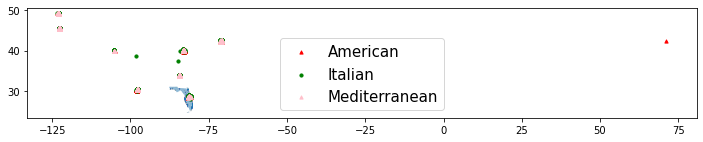

In [38]:
#plotting three categories on the US map  
#NEED TO FIX the size of the map currently too small
fig,ax = plt.subplots(figsize = (12,12))
fl_map.plot(ax = ax, alpha = 0.6)
#fl_map[fl_map['COUNTYFP'] == '103'].plot(ax = ax, color = 'blue')
geo_df[geo_df['simplified_category'] == 'American'].plot(ax = ax, markersize = 10, color = 'red', marker = '^', label = 'American')
geo_df[geo_df['simplified_category'] == 'Italian'].plot(ax = ax, markersize = 10, color = 'green', marker = 'o', label = 'Italian')
geo_df[geo_df['simplified_category'] == 'Mediterranean'].plot(ax = ax, markersize = 10, color = 'pink', marker = '^', label = 'Mediterranean')
#geo_df[geo_df['simplified_category'] == 'seafood'].plot(ax = ax, markersize = 10, color = 'yellow', marker = 'o', label = 'seafood')


plt.legend(prop = {'size': 15})


In [39]:
#!pip install pandas_bokeh

In [80]:
## display all the datapoints on map

#pandas_bokeh.output_notebook()
#geo_df.set_index('geometry')


#geo_df.plot_bokeh(simplify_shapes=20000,
#                  category="stars", 
#                  colormap="Spectral", 
#                  hovertool_columns=["postal_code","stars"])

In [41]:
df_fl['simplified_category'].unique()

array(['American', 'Grocery', 'Italian', 'Chinese', 'Cafe', 'Pizza',
       'Breakfast', 'Caribbean', 'seafood', 'Vietnamese', 'Other',
       'Desserts', 'Mexican', 'Fast Food', 'Deli', 'Ice Cream', 'Bar',
       'Mediterranean', 'Sandwiches', 'Food Truck', 'Convenience Store',
       'Bakery', 'Thai', 'Japanese', 'Specialty Food', 'Korean', 'Indian',
       'Middle Eastern', 'Burgers', 'Vegan'], dtype=object)

In [2]:
#df_fl.sort_values(by = 'stars', ascending = True).iloc[0]

In [45]:
#creating a dataframe of average rating per category by state
taste = pd.pivot_table(df_states,
               index='state', columns='simplified_category', values='stars', aggfunc = np.average
              ).dropna()


<AxesSubplot:xlabel='simplified_category'>

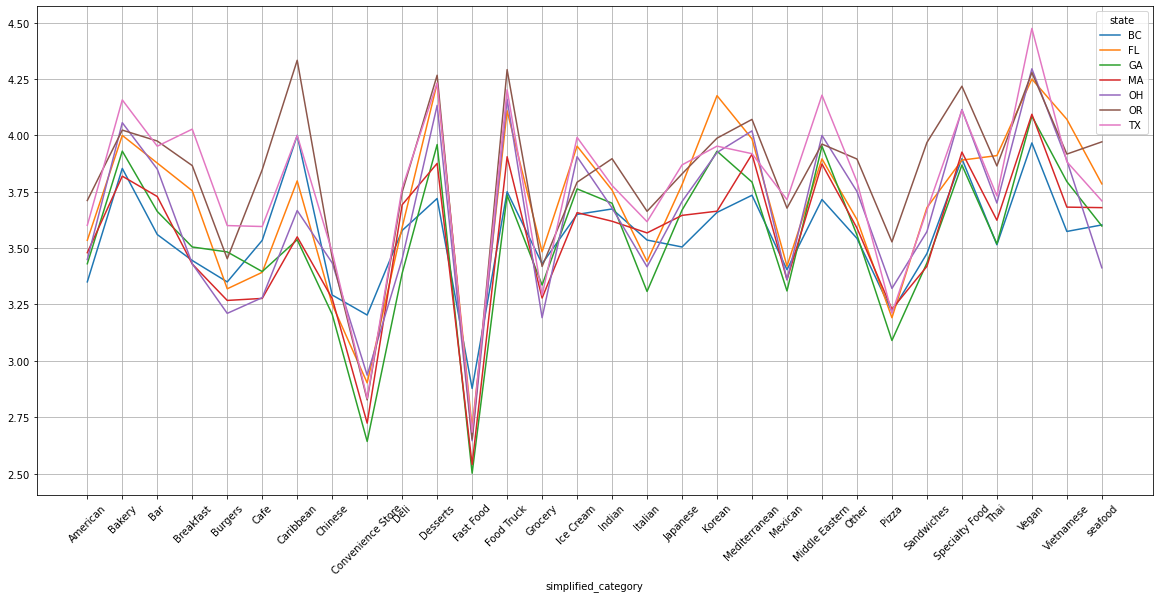

In [65]:
#ploting the data
fig,ax = plt.subplots(figsize = (20,9))
ax.set_xticks(np.arange(taste.shape[1]))
taste.T.plot(ax = ax,grid = True, rot = 45)
#fig.suptitle('test title', fontsize=20)
#plt.xlabel('xlabel', fontsize=18)
#plt.ylabel('ylabel', fontsize=16)

In [60]:
#rearranging the based on rating of each category
t2 = taste.reindex(taste.mean().sort_values(ascending = False).index, axis = 1)

In [ ]:
#plotting the data
fig,ax = plt.subplots(figsize = (20,9))
ax.set_xticks(np.arange(taste.shape[1]))
t2.T.plot(ax = ax,grid = True, rot = 60)
fig.suptitle('Rating of Categories By State', fontsize=20)
#plt.xlabel('Simplified_category',fontsize=18)
plt.ylabel('Avg_Stars', fontsize=18)
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)
#ax.set_fontsize(16)